In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
vector = np.array([0,255,128,64])
vector_sum = vector + 10
vector_normalized = vector_sum / 255
print("original vector", vector)
print("vector sum", vector_sum)
print("vector normalized", vector_normalized)

original vector [  0 255 128  64]
vector sum [ 10 265 138  74]
vector normalized [0.03921569 1.03921569 0.54117647 0.29019608]


In [4]:
image_matrix = np.array([
    [0,128,255],
    [64,192,128],
    [255,0,64]
])

In [5]:
transformed_matrix = image_matrix + 50
normalized_matrix = transformed_matrix / 255
print("original matrix", image_matrix)
print("transformed matrix", transformed_matrix)
print("normalized matrix", normalized_matrix)

original matrix [[  0 128 255]
 [ 64 192 128]
 [255   0  64]]
transformed matrix [[ 50 178 305]
 [114 242 178]
 [305  50 114]]
normalized matrix [[0.19607843 0.69803922 1.19607843]
 [0.44705882 0.94901961 0.69803922]
 [1.19607843 0.19607843 0.44705882]]


In [6]:
transposed_matrix = np.transpose(image_matrix)
print(image_matrix)
print("transposed matrix", transposed_matrix)

[[  0 128 255]
 [ 64 192 128]
 [255   0  64]]
transposed matrix [[  0  64 255]
 [128 192   0]
 [255 128  64]]


In [7]:
from scipy.signal import convolve2d

In [8]:
image_matrix = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

filter_matrix = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [9]:
# apply convolution
convolved_matrix = convolve2d(image_matrix, filter_matrix, mode='same')
print(image_matrix)
print(filter_matrix)
print(convolved_matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[ -7  -4   7]
 [-15  -6  15]
 [-13  -4  13]]


In [10]:
# Affine transformation

In [11]:
point = np.array([1, 2])
scaling_matrix = np.array([[2,0],
                          [0, 2]])
scaled_point = np.dot(scaling_matrix, point)
print(point)
print(scaled_point)

[1 2]
[2 4]


In [12]:
# Pronciple Component Analysis (PCA)
from sklearn.decomposition import PCA

data = np.array([[1,2],
                 [3,4],
                 [5,6],
                [7,8]])

pca = PCA(n_components=1)
transformed_data = pca.fit_transform(data)
print(data)
print(transformed_data)
print(pca.components_)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[-4.24264069]
 [-1.41421356]
 [ 1.41421356]
 [ 4.24264069]]
[[0.70710678 0.70710678]]


In [13]:
# Eigenvalues and eigenvectors
A = np.array([[2,1],
                  [1,2]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print(A)
print(eigenvalues)
print(eigenvectors)

[[2 1]
 [1 2]]
[3. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [14]:
for i in range(len(eigenvalues)):
  eigenvalue = eigenvalues[i]
  eigenvector = eigenvectors[:, i]
  print(f"Eigenvalue {i+1}: {eigenvalue}")
  print(f"Eigenvector {i+1}: {eigenvector}")

Eigenvalue 1: 3.0
Eigenvector 1: [0.70710678 0.70710678]
Eigenvalue 2: 1.0
Eigenvector 2: [-0.70710678  0.70710678]


In [15]:
for i in range(len(eigenvalues)):
  eigenvalue = eigenvalues[i]
  eigenvector = eigenvectors[:, i]
  Av = np.dot(A, eigenvector)
  lambda_v = eigenvalue * eigenvector
  print(f"Av: {Av}")
  print(f"lambda_v: {lambda_v}")
  print("Difference: ", np.allclose(Av, lambda_v))

Av: [2.12132034 2.12132034]
lambda_v: [2.12132034 2.12132034]
Difference:  True
Av: [-0.70710678  0.70710678]
lambda_v: [-0.70710678  0.70710678]
Difference:  True


# Task
Load the Excel file "/content/drive/MyDrive/Rejestr_Produktow_Leczniczych_calosciowy_stan_na_dzien_20250914.xlsx" into a pandas DataFrame. Iterate through the rows of the DataFrame. For each row, get the URL from the 'Charakterystyka' column, download the PDF from the URL, and save it to the 'ChPL_PDF' directory. Create the directory 'ChPL_PDF' if it doesn't already exist. Include error handling for cases where a URL is invalid or a download fails.

## Load the data

### Subtask:
Load the Excel file "/content/drive/MyDrive/Rejestr_Produktow_Leczniczych_calosciowy_stan_na_dzien_20250914.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the Excel file into a pandas DataFrame and display the first few rows and info to verify.



In [16]:
excel_file_path = "/content/drive/MyDrive/Rejestr_Produktow_Leczniczych_calosciowy_stan_na_dzien_20250914.xlsx"
df = pd.read_excel(excel_file_path)
display(df.head())
df.info()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Identyfikator Produktu Leczniczego,Nazwa Produktu Leczniczego,Nazwa powszechnie stosowana,Rodzaj preparatu,Zakaz stosowania u zwierząt,Nazwa poprzednia produktu,Droga podania - Gatunek - Tkanka - Okres karencji,Moc,Postać farmaceutyczna,Typ procedury,...,Kraj eksportu,Podstawa prawna wniosku,Ulotka,Charakterystyka,Etykieto-ulotka,Ulotka importu równoległego,Etykieto-ulotka importu równoległego,Oznakowanie opakowań importu równoległego,Narzędzia edukacyjne dla osoby wykonującej zawód medyczny,Narzędzia edukacyjne dla pacjenta
0,100000014,Zoledronic acid Fresenius Kabi,Acidum zoledronicum,Ludzki,NaN,NaN,dożylna,4 mg/5 ml,Koncentrat do sporządzania roztworu do infuzji,DCP,...,NaN,art. 15 ust. 1 pkt 2,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,NaN,NaN,NaN,NaN,NaN,NaN
1,100000020,Edelan,Mometasoni furoas,Ludzki,NaN,NaN,na skórę,1 mg/g,Krem,NAR,...,NaN,art. 15 ust. 12,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,NaN,NaN,NaN,NaN,NaN,NaN
2,100000037,Nalgesin,Naproxenum natricum,Ludzki,NaN,NaN,doustna,275 mg,Tabletki powlekane,DCP,...,NaN,art. 16 ust. 1,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,NaN,NaN,NaN,NaN,NaN,NaN
3,100000043,Nalgesin Forte,Naproxenum natricum,Ludzki,NaN,NaN,doustna,550 mg,Tabletki powlekane,DCP,...,NaN,art. 16 ust. 1,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,NaN,NaN,NaN,NaN,NaN,NaN
4,100000089,Diprobase,-,Ludzki,NaN,NaN,na skórę,-,Krem,NAR,...,NaN,art. 10 ust. 1 i 2,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,https://rejestrymedyczne.ezdrowie.gov.pl/api/r...,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22514 entries, 0 to 22513
Data columns (total 33 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Identyfikator Produktu Leczniczego                         22514 non-null  int64 
 1   Nazwa Produktu Leczniczego                                 22514 non-null  object
 2   Nazwa powszechnie stosowana                                22499 non-null  object
 3   Rodzaj preparatu                                           22514 non-null  object
 4   Zakaz stosowania u zwierząt                                166 non-null    object
 5   Nazwa poprzednia produktu                                  1329 non-null   object
 6   Droga podania - Gatunek - Tkanka - Okres karencji          22457 non-null  object
 7   Moc                                                        22379 non-null  object
 8   Postać farmaceut

## Create output directory

### Subtask:
Create the directory 'ChPL_PDF' if it doesn't already exist.


**Reasoning**:
Create the output directory for storing the downloaded PDFs if it doesn't already exist.



In [17]:
import os

output_dir = 'ChPL_PDF'
os.makedirs(output_dir, exist_ok=True)
print(f"Directory '{output_dir}' created or already exists.")

Directory 'ChPL_PDF' created or already exists.


## Iterate and download

### Subtask:
Iterate through the rows of the DataFrame. For each row, get the URL from the 'Charakterystyka' column, download the PDF from the URL, and save it to the 'ChPL_PDF' directory.


**Reasoning**:
Iterate through the DataFrame, extract URLs, download PDFs, and save them to the specified directory, handling potential errors.



In [21]:
# Singular Value Decomposition (SVD)

In [23]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

In [24]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
U, Sigma, VT = np.linalg.svd(A) # Perform Singular Value Decomposition
U

array([[-0.21483724,  0.88723069,  0.40824829],
       [-0.52058739,  0.24964395, -0.81649658],
       [-0.82633754, -0.38794278,  0.40824829]])

In [33]:
Sigma

array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16])

In [34]:
VT

array([[-0.47967118, -0.57236779, -0.66506441],
       [-0.77669099, -0.07568647,  0.62531805],
       [-0.40824829,  0.81649658, -0.40824829]])

In [35]:
# Convert Sigma to a diagonal matrix
Sigma_matrix = np.zeros((A.shape[0], A.shape[1]))
Sigma_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [36]:
Sigma_matrix[:len(Sigma), :len(Sigma)] = np.diag(Sigma)

In [38]:
print("Original Matrix A:\n", U)
print("Left Singular Vectors (U):\n", U)
print("Right Singular Vectors Transposed (VT):\n", VT)
print("Reconstructed Matrix A using SVD:\n", np.dot(U, np.dot(Sigma_matrix, VT)))

Original Matrix A:
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Left Singular Vectors (U):
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Right Singular Vectors Transposed (VT):
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]
Reconstructed Matrix A using SVD:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [39]:
# Calculus in Image Processing

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel

In [41]:
image = np.array([
    [10,20,30,40],
    [50,60,70,80],
    [90,100,110,120],
    [130,140,150,160]
], dtype=float)

In [42]:
image

array([[ 10.,  20.,  30.,  40.],
       [ 50.,  60.,  70.,  80.],
       [ 90., 100., 110., 120.],
       [130., 140., 150., 160.]])

In [43]:
# Compute gradients using Sobel operators

In [44]:
gradient_x = sobel(image, axis=0) #  Gradient in x direction
gradient_y = sobel(image, axis=1) # Gradient in y direction

In [46]:
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_direction = np.arctan2(gradient_y, gradient_x) # Direction of gradient

In [47]:
gradient_magnitude

array([[164.92422502, 178.8854382 , 178.8854382 , 164.92422502],
       [322.49030993, 329.84845005, 329.84845005, 322.49030993],
       [322.49030993, 329.84845005, 329.84845005, 322.49030993],
       [164.92422502, 178.8854382 , 178.8854382 , 164.92422502]])

In [48]:
gradient_direction

array([[0.24497866, 0.46364761, 0.46364761, 0.24497866],
       [0.12435499, 0.24497866, 0.24497866, 0.12435499],
       [0.12435499, 0.24497866, 0.24497866, 0.12435499],
       [0.24497866, 0.46364761, 0.46364761, 0.24497866]])

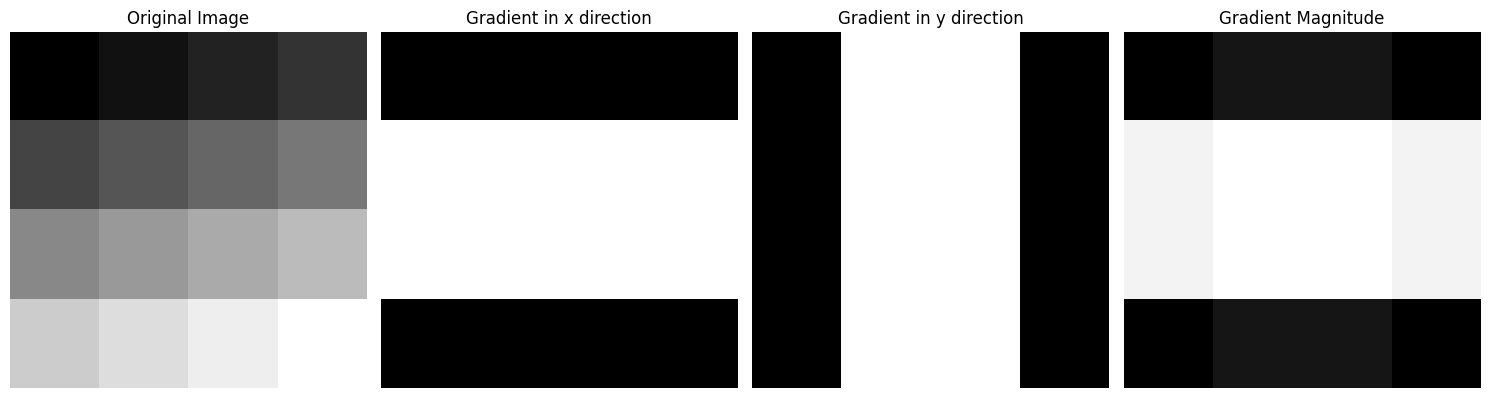

In [51]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(gradient_x, cmap='gray')
axes[1].set_title('Gradient in x direction')
axes[2].imshow(gradient_y, cmap='gray')
axes[2].set_title('Gradient in y direction')
axes[3].imshow(gradient_magnitude, cmap='gray')
axes[3].set_title('Gradient Magnitude')

for ax in axes:
  ax.axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gradient Magnitude')

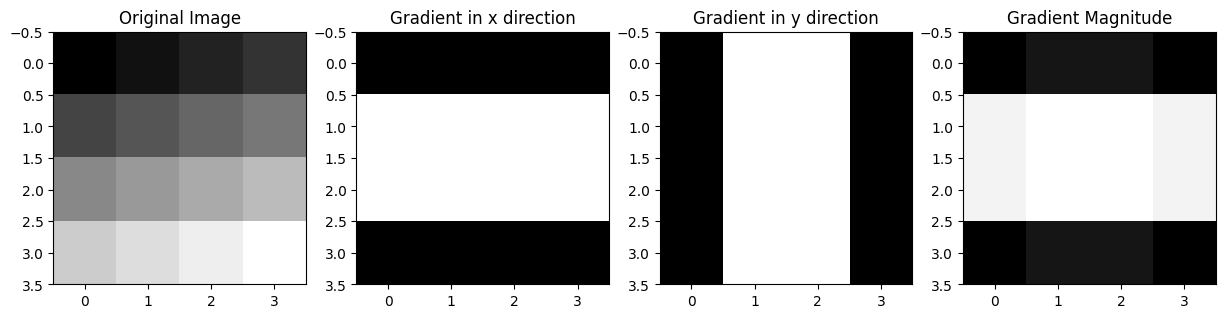

In [52]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(gradient_x, cmap='gray')
axes[1].set_title('Gradient in x direction')
axes[2].imshow(gradient_y, cmap='gray')
axes[2].set_title('Gradient in y direction')
axes[3].imshow(gradient_magnitude, cmap='gray')
axes[3].set_title('Gradient Magnitude')

In [53]:
# Edge Detection:
# Sobel Operator
# Canny Edge Detector

In [55]:
# Canny Edge Detector

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # skimage feature

In [62]:
image = np.array([
    [10,20,30,40],
    [50,60,70,80],
    [90,100,110,120],
    [130,140,150,160]
], dtype=float)

In [63]:
# Compute edges using the Canny edge detector

In [65]:
edges = feature.canny(image)
edges

array([[False, False, False, False],
       [False,  True,  True, False],
       [False,  True, False, False],
       [False, False, False, False]])

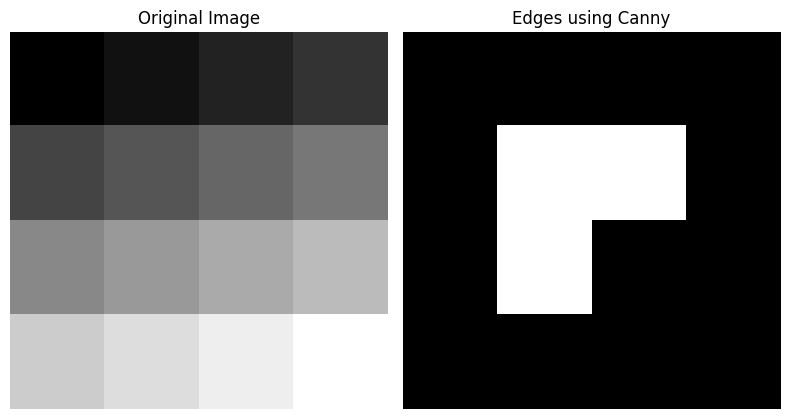

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Edges using Canny')
plt.axis('off')

plt.tight_layout()
plt.show()

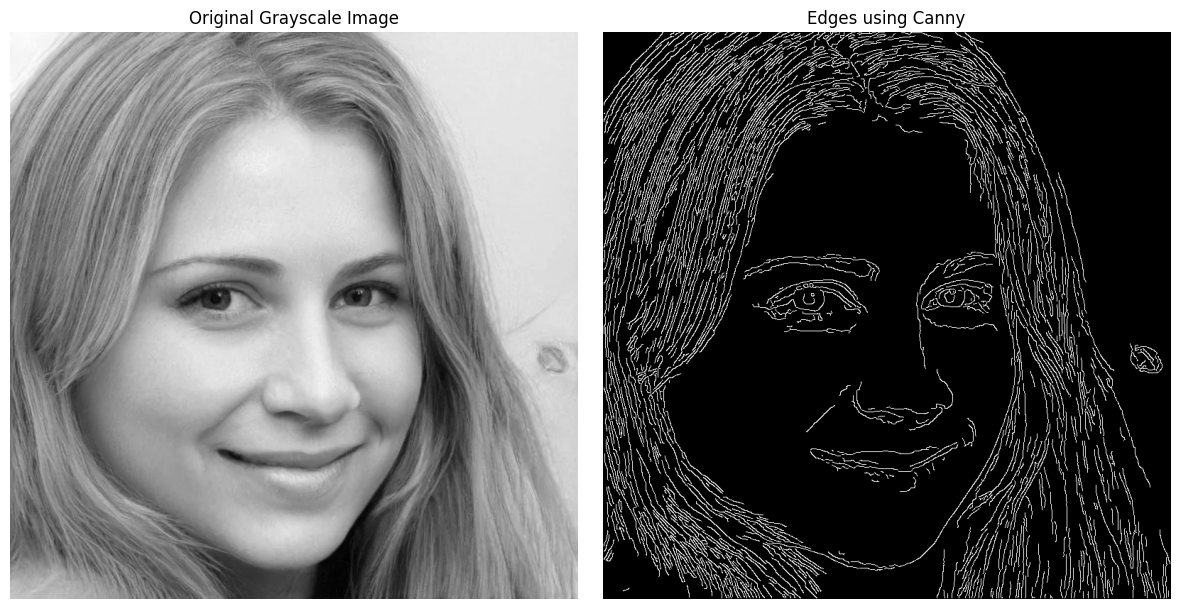

In [73]:
import requests
from PIL import Image
from io import BytesIO
from skimage import feature
import matplotlib.pyplot as plt
import numpy as np

# Load an image from Google Drive
image_path = "/content/drive/MyDrive/non_existing_person.jpg"

try:
    img = Image.open(image_path)

    # Convert the image to grayscale
    gray_image = img.convert('L')
    gray_image_array = np.array(gray_image)

    # Apply the Canny edge detector
    edges = feature.canny(gray_image_array)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges using Canny')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file was not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

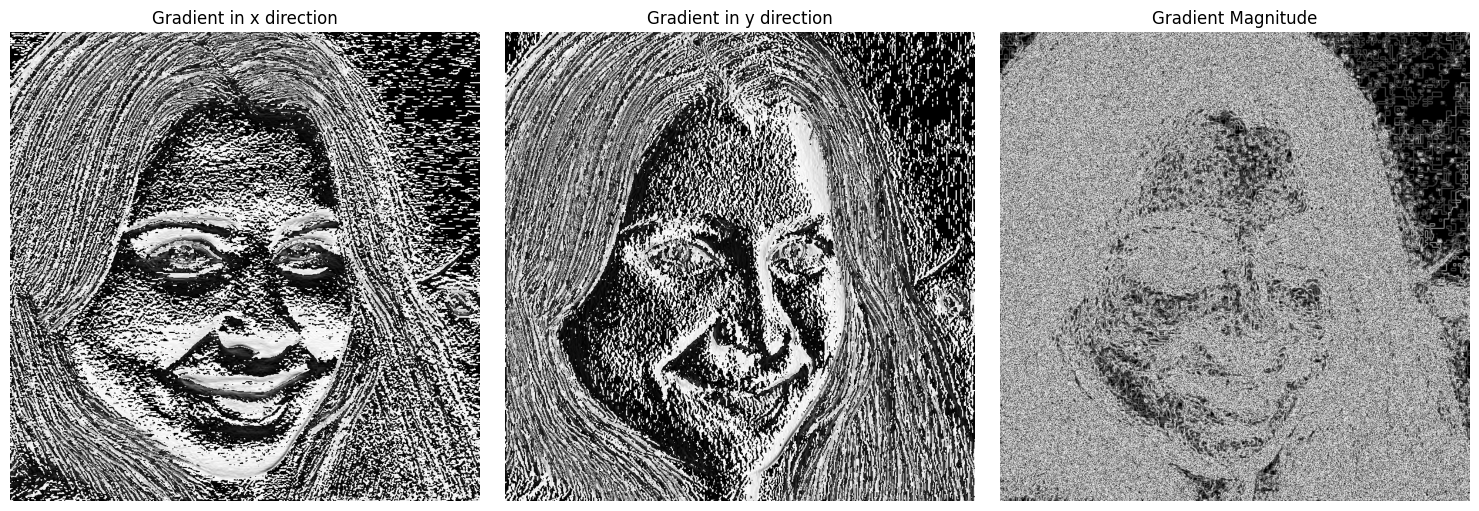

In [74]:
# Compute gradients using Sobel operators
gradient_x = sobel(gray_image_array, axis=0)  # Gradient in x direction
gradient_y = sobel(gray_image_array, axis=1)  # Gradient in y direction

# Compute gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the gradient images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient in x direction')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient in y direction')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

In [75]:
# Optimization techniques

In [76]:
# 1. Gradient Descent

Iteration 0: x = 0.4, loss = 2.5600000000000005
Iteration 100: x = 1.9999999996740743, loss = 1.0622758202916343e-19
Iteration 200: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 300: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 400: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 500: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 600: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 700: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 800: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Iteration 900: x = 1.9999999999999996, loss = 1.9721522630525295e-31
Minimum found at x = 1.9999999999999996, loss = 1.9721522630525295e-31


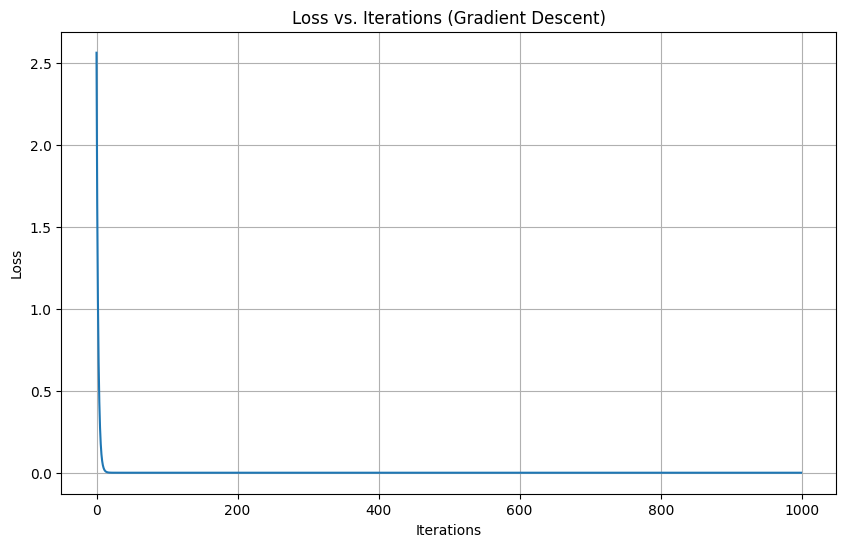

In [89]:
import matplotlib.pyplot as plt

def loss_function(x):
  return (x-2)**2

def gradient(x):
  return 2 * (x-2)

learning_rate = 0.1
iterations = 1000
x = 0 # initial guess

loss_history = [] # Store loss at each iteration

for i in range(iterations):
  grad = gradient(x)
  x = x - learning_rate * grad
  loss = loss_function(x)
  loss_history.append(loss)
  if i%100 == 0: # Print less frequently to avoid clutter
    print(f"Iteration {i}: x = {x}, loss = {loss}")

print(f"Minimum found at x = {x}, loss = {loss_function(x)}")

# Plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Gradient Descent)')
plt.grid(True)
plt.show()

In [81]:
# 2. Stochastic Gradient Descent (SGD)

In [86]:
def loss_function(x):
  return (x-2)**2

def gradient(x):
  return 2 * (x-2)

# Stochastic Gradient Descent parameters
learning_rate = 0.1
iterations = 1000
x = 0 # initial guess

# Stochastic Gradient Descent algorithm
for i in range(iterations): # simulate using one training example
  grad = gradient(x)
  x = x - learning_rate * grad
  if i%10 == 0:
    print(f"Iteration {i}: x = {x}, loss = {loss_function(x)}")

print(f"Minimum found at x = {x}, loss = {loss_function(x)}")

Iteration 0: x = 0.4, loss = 2.5600000000000005
Iteration 10: x = 1.8282013081600001, loss = 0.029514790517935232
Iteration 20: x = 1.9815532559262903, loss = 0.00034028236692094466
Iteration 30: x = 1.9980192959371432, loss = 3.9231885846173355e-06
Iteration 40: x = 1.9997873235206742, loss = 4.5231284858404035e-08
Iteration 50: x = 1.9999771640369166, loss = 5.214812099459346e-10
Iteration 60: x = 1.9999975480071346, loss = 6.0122690120481215e-12
Iteration 70: x = 1.9999997367192708, loss = 6.931674237755982e-14
Iteration 80: x = 1.999999971730447, loss = 7.991676223413419e-16
Iteration 90: x = 1.9999999969645799, loss = 9.21377541092767e-18
Iteration 100: x = 1.9999999996740743, loss = 1.0622758202916343e-19
Iteration 110: x = 1.999999999965004, loss = 1.2247204424629963e-21
Iteration 120: x = 1.9999999999962423, loss = 1.412001505720693e-23
Iteration 130: x = 1.9999999999995965, loss = 1.6277597506982582e-25
Iteration 140: x = 1.9999999999999567, loss = 1.874777245064311e-27
Iterat

In [87]:
# 3. Momentum

In [88]:
def loss_function(x):
  return (x-2)**2

def gradient(x):
  return 2*(x-2)

# Momentum parameters
learning_rate = 0.1
iterations = 1000
beta = 0.9
x = 0 # initial guess
v = 0 # initial velocity

# Momentum algorithm
for i in range(iterations): # simulate using one training example
  grad = gradient(x)
  v = beta * v + learning_rate * grad
  x = x - v
  if i%10 == 0:
    print(f"Iteration {i}: x = {x}, loss = {loss_function(x)}")

print(f"Minimum found at x = {x}, loss = {loss_function(x)}")

Iteration 0: x = 0.4, loss = 2.5600000000000005
Iteration 10: x = 1.4914865563599995, loss = 0.25858592236261196
Iteration 20: x = 2.624245743293139, loss = 0.38968274801960384
Iteration 30: x = 2.095844544225939, loss = 0.00918617665787798
Iteration 40: x = 1.7698313992044525, loss = 0.052977584792180094
Iteration 50: x = 1.9966177298502958, loss = 1.143975136557979e-05
Iteration 60: x = 2.080696209849949, loss = 0.006511878284147018
Iteration 70: x = 1.9906485907341034, loss = 8.744885525829708e-05
Iteration 80: x = 1.9730833162638013, loss = 0.0007245078633545441
Iteration 90: x = 2.006773221516226, loss = 4.587652970786912e-05
Iteration 100: x = 2.0085013720829563, loss = 7.2273327292869e-05
Iteration 110: x = 1.9965289074241594, loss = 1.2048483670055391e-05
Iteration 120: x = 1.9974887272009048, loss = 6.306491071475658e-06
Iteration 130: x = 2.001538012465854, loss = 2.3654823451228124e-06
Iteration 140: x = 2.0006749183700148, loss = 4.5551480618338777e-07
Iteration 150: x = 1.

In [90]:
# 4. Adam Optimization

Iteration 100: x = 2.00842280041096, loss = 7.094356676286975e-05
Iteration 200: x = 1.9999430973298646, loss = 3.237913868533754e-09
Iteration 300: x = 2.0000001711881765, loss = 2.93053917813293e-14
Iteration 400: x = 2.000000000638678, loss = 4.079095868870752e-19
Iteration 500: x = 1.9999999999905933, loss = 8.848596054765004e-23
Iteration 600: x = 2.00000000000005, loss = 2.518241224691775e-27
Iteration 700: x = 2.0000000000000004, loss = 1.9721522630525295e-31
Iteration 800: x = 2.0, loss = 0.0
Iteration 900: x = 2.0, loss = 0.0
Iteration 1000: x = 2.0, loss = 0.0
Minimum found at x = 2.0, loss = 0.0


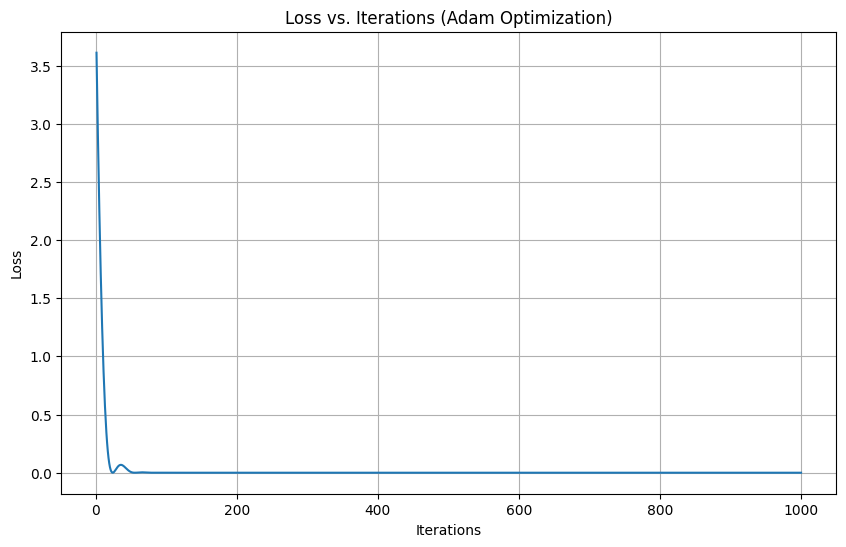

In [93]:
def loss_function(x):
  return (x-2)**2

def gradient(x):
  return 2*(x-2)

# Adam parameters
learning_rate = 0.1
iterations = 1000
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m = 0 # initial first moment
v = 0 # initial second moment
x = 0 # initial guess
m_hat = 0 # bias-corrected first moment
v_hat = 0 # bias-corrected second moment

loss_history = [] # Store loss at each iteration

# Adam algorithm
for i in range(1, iterations+1): # simulate using one training example
  grad = gradient(x)
  m = beta1 * m + (1 - beta1) * grad
  v = beta2 * v + (1 - beta2) * grad**2
  m_hat = m / (1 - beta1**i)
  v_hat = v / (1 - beta2**i)
  x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
  loss = loss_function(x)
  loss_history.append(loss)
  if i%100 == 0:
    print(f"Iteration {i}: x = {x}, loss = {loss}")

print(f"Minimum found at x = {x}, loss = {loss_function(x)}")

# Plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations (Adam Optimization)')
plt.grid(True)
plt.show()